# Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/thuyduc/GG Advanced Data Analytics/Course 5/Module 4/Hypothesis testing with Python/marketing_sales_data.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = data[['Radio', 'Social Media', 'Sales']]
df = df.dropna()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=['Radio', 'Social Media', 'Sales'])
df.head()

,Radio,Social Media,Sales
0,-1.808070,-0.898526,-1.146910
1,-0.380950,-1.352277,0.321089
2,-0.856177,-1.449071,-1.006175
3,0.816280,1.744041,1.488272
4,1.897891,1.993542,1.749018


In [5]:
X = df[['Radio', 'Social Media']]
y = df['Sales']
df.isnull().sum()

Radio           0
Social Media    0
Sales           0
dtype: int64

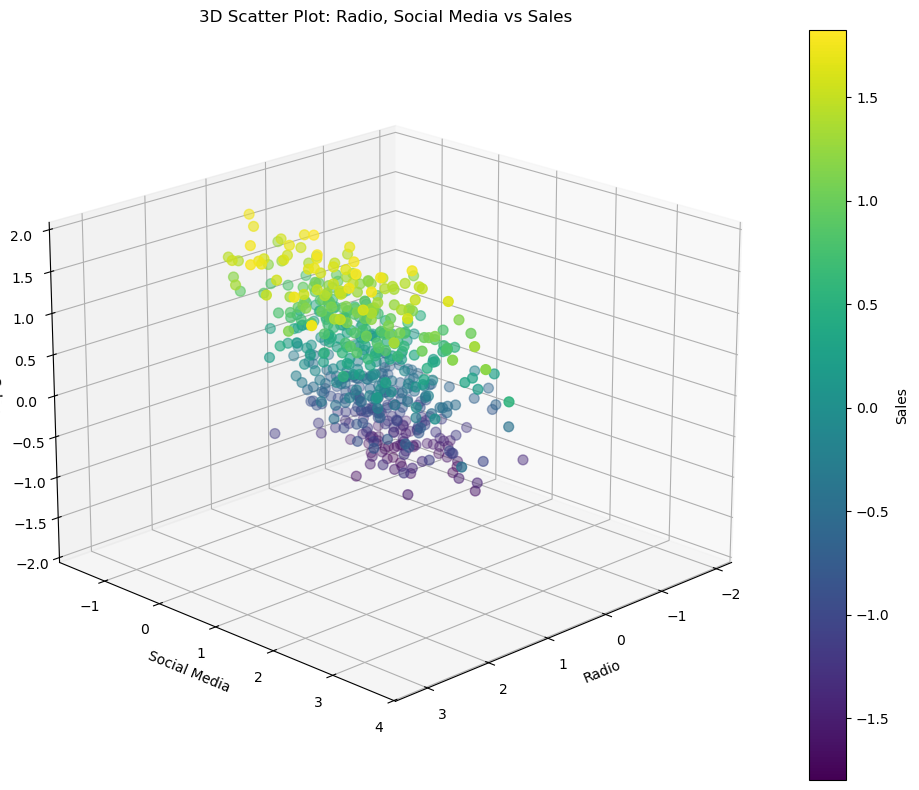

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(X['Radio'], 
                    X['Social Media'], 
                    y,
                    c=y,           # Color points based on Sales values
                    cmap='viridis', # Choose colormap
                    s=50)          # Point size

# Add labels and title
ax.set_xlabel('Radio')
ax.set_ylabel('Social Media')
ax.set_zlabel('Sales')
ax.set_title('3D Scatter Plot: Radio, Social Media vs Sales')

# Add a color bar
plt.colorbar(scatter, label='Sales')

# Adjust the viewing angle
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

# Code polynomial regression

In [7]:
df.head()

,Radio,Social Media,Sales
0,-1.808070,-0.898526,-1.146910
1,-0.380950,-1.352277,0.321089
2,-0.856177,-1.449071,-1.006175
3,0.816280,1.744041,1.488272
4,1.897891,1.993542,1.749018


In [53]:
row = np.array([-1.808070, -0.898526])
a = [1, *(X**2)] 
a = np.array(a) 
a# Unpacks the elements of the list

array([1.        , 3.26911712, 0.80734897])

In [54]:
def simple_feature_transform(row: np.array, degree: int = 1) -> np.array:
    a = np.array([1, *row])
    if degree == 1:
        return a
    else:
        for i in range(2, degree+1):
            a = np.append(a, row**i)
        return a

simple_feature_transform(row, degree=3)


array([ 1.        , -1.80807   , -0.898526  ,  3.26911712,  0.80734897,
       -5.9107926 , -0.72542404])

In [59]:
df_transform = df[['Radio', 'Social Media']].apply(lambda row: simple_feature_transform(row, 2), axis=1)
df_transform.shape, df_transform[0], type(df_transform.values)

((570,),
 array([ 1.        , -1.80806997, -0.89852633,  3.26911702,  0.80734956]),
 numpy.ndarray)

In [67]:
def linear_regression(w, x):
    """Calculate y_hat using a linear function."""
    y_hat = np.dot(w, x)
    return y_hat

w = np.array([i for i in range(len(df_transform[0]))])

y_hat = linear_regression(w, df_transform[0])
y_hat


9.431626684844279

In [66]:
def cost_calculation(y_true, y_hat):
    return (y_hat - y_true)**2

y_true = df['Sales'][0]
cost = cost_calculation(y_true, y_hat)
cost

111.90544815956912

In [70]:
def update_weight(w, dldw, alpha=0.01):
    w = w - alpha * dldw
    return w 

dldw = 2 * (y_hat - y_true) * df_transform[0]
w = update_weight(w, dldw, alpha=0.01)
dldw, w

(array([ 21.15707429, -38.2534707 , -19.0101883 ,  69.16495164,
         17.08115471]),
 array([-0.21157074,  1.38253471,  2.19010188,  2.30835048,  3.82918845]))

# Mini-batch GD

In [90]:
epochs = 6
batch_size = 3
alpha = 0.0000000001

## D = 2

Epoch: 0, Batch: 0, Cost: 1.3143634126969994, w: [ 0.03005535  0.90716221  0.11336092  0.00186098 -0.08923849]
Epoch: 0, Batch: 3, Cost: 0.6407244076438052, w: [ 0.03005536  0.90716221  0.11336092  0.00186098 -0.08923848]
Epoch: 0, Batch: 6, Cost: 0.0523474321220179, w: [ 0.03005536  0.90716221  0.11336092  0.00186098 -0.08923848]
Epoch: 0, Batch: 9, Cost: 0.8174370411262158, w: [ 0.03005536  0.90716221  0.11336092  0.00186098 -0.08923848]
Epoch: 0, Batch: 12, Cost: 0.17956505186642946, w: [ 0.03005536  0.90716221  0.11336092  0.00186098 -0.08923848]
Epoch: 0, Batch: 15, Cost: 0.3344953729014835, w: [ 0.03005536  0.90716221  0.11336092  0.00186098 -0.08923848]
Epoch: 0, Batch: 18, Cost: 0.14866509745283696, w: [ 0.03005536  0.90716221  0.11336092  0.00186098 -0.08923848]
Epoch: 0, Batch: 21, Cost: 1.2147312598436186, w: [ 0.03005536  0.90716221  0.11336092  0.00186098 -0.08923848]
Epoch: 0, Batch: 24, Cost: 2.469441925515961, w: [ 0.03005536  0.90716221  0.11336092  0.00186098 -0.08923

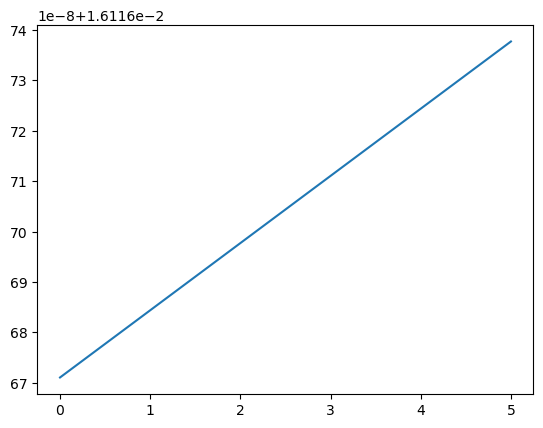

In [91]:
losses = []
for epoch in range(epochs):
    for batch in range(0, len(df_transform), batch_size):
        # 1. Get Samples
        samples = df_transform[batch: batch + batch_size].values
        y_true = df['Sales'][batch: batch + batch_size].values

        dldw = 0
        cost = 0
        for i in range(batch_size):
            # 2. Calculate y_hat
            y_hat_i = linear_regression(w, samples[i])

            # 3. Calculate cost
            cost += cost_calculation(y_true[i], y_hat_i)

            # 4. Calculate dL/dw
            dldw += 2 * (y_hat_i - y_true[i]) * samples[i]

            # 5. Update weights
            w = update_weight(w, dldw, alpha=alpha)
        
        dldw = dldw / batch_size
        loss = cost / batch_size
        print(f'Epoch: {epoch}, Batch: {batch}, Cost: {cost}, w: {w}')
    losses.append(loss)

plt.plot(losses)

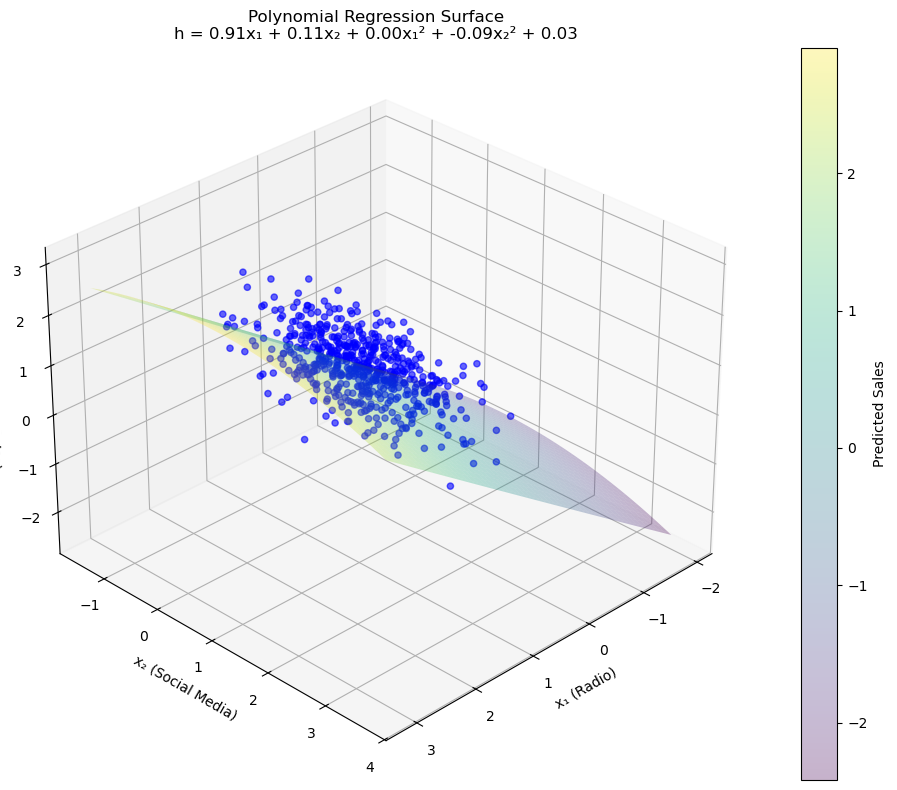

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Create figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot actual data points
scatter = ax.scatter(df['Radio'], 
                    df['Social Media'], 
                    df['Sales'],
                    c='blue',
                    alpha=0.6,
                    label='Actual Data')

# Create mesh grid for the polynomial surface
x1_surf = np.linspace(df['Radio'].min(), df['Radio'].max(), 100)
x2_surf = np.linspace(df['Social Media'].min(), df['Social Media'].max(), 100)
x1_surf, x2_surf = np.meshgrid(x1_surf, x2_surf)

# Calculate predicted values with polynomial terms
# h = w₁x₁ + w₂x₂ + w₃(x₁²) + w₄(x₂²) + w₀
h_surf = (w[1] * x1_surf + 
         w[2] * x2_surf + 
         w[3] * x1_surf**2 + 
         w[4] * x2_surf**2 + 
         w[0])  # w[0] is bias term

# Plot the polynomial surface
surface = ax.plot_surface(x1_surf, x2_surf, h_surf, 
                         alpha=0.3,
                         cmap='viridis')

# Add equation text to title
equation = f'h = {w[1]:.2f}x₁ + {w[2]:.2f}x₂ + {w[3]:.2f}x₁² + {w[4]:.2f}x₂² + {w[0]:.2f}'
ax.set_title(f'Polynomial Regression Surface\n{equation}')

# Add labels
ax.set_xlabel('x₁ (Radio)')
ax.set_ylabel('x₂ (Social Media)')
ax.set_zlabel('h (Predicted Sales)')

# Add colorbar
fig.colorbar(surface, ax=ax, label='Predicted Sales')

# Adjust the viewing angle for better visibility of the curved surface
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()

## D = 3

In [102]:
w = np.random.rand(len(df_transform[0]))
w

array([0.33803534, 0.36888222, 0.72330863, 0.07531668, 0.8350696 ,
       0.7933875 , 0.98070498])

In [103]:
df_transform = df[['Radio', 'Social Media']].apply(lambda row: simple_feature_transform(row, 3), axis=1)
df_transform.shape, df_transform[0], type(df_transform.values)

((570,),
 array([ 1.        , -1.80806997, -0.89852633,  3.26911702,  0.80734956,
        -5.91079231, -0.72542484]),
 numpy.ndarray)

Epoch: 0, Batch: 0, Cost: 25.595908488205858, w: [0.33803534 0.36888222 0.72330862 0.07531669 0.83506961 0.79338749
 0.98070497]
Epoch: 0, Batch: 3, Cost: 389.08345335249123, w: [0.33803533 0.3688822  0.7233086  0.07531666 0.83506956 0.79338744
 0.98070489]
Epoch: 0, Batch: 6, Cost: 180.0570339556871, w: [0.33803532 0.36888218 0.72330858 0.07531663 0.83506954 0.79338738
 0.98070485]
Epoch: 0, Batch: 9, Cost: 20.118315372830615, w: [0.33803532 0.36888218 0.72330858 0.07531664 0.83506955 0.79338737
 0.98070485]
Epoch: 0, Batch: 12, Cost: 160.84289052777495, w: [0.33803531 0.36888217 0.72330857 0.07531663 0.83506952 0.79338735
 0.9807048 ]
Epoch: 0, Batch: 15, Cost: 4290.296625508735, w: [0.33803528 0.3688821  0.72330842 0.07531651 0.835069   0.79338716
 0.98070288]
Epoch: 0, Batch: 18, Cost: 21.456298334896168, w: [0.33803527 0.3688821  0.72330842 0.07531651 0.83506899 0.79338715
 0.98070288]
Epoch: 0, Batch: 21, Cost: 10.454781743651758, w: [0.33803527 0.3688821  0.72330842 0.07531651 0

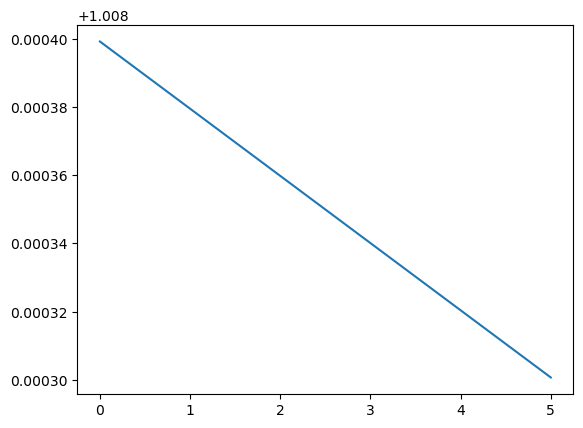

In [104]:
losses = []
for epoch in range(epochs):
    for batch in range(0, len(df_transform), batch_size):
        # 1. Get Samples
        samples = df_transform[batch: batch + batch_size].values
        y_true = df['Sales'][batch: batch + batch_size].values

        dldw = 0
        cost = 0
        for i in range(batch_size):
            # 2. Calculate y_hat
            y_hat_i = linear_regression(w, samples[i])

            # 3. Calculate cost
            cost += cost_calculation(y_true[i], y_hat_i)

            # 4. Calculate dL/dw
            dldw += 2 * (y_hat_i - y_true[i]) * samples[i]

            # 5. Update weights
            w = update_weight(w, dldw, alpha=alpha)
        
        dldw = dldw / batch_size
        loss = cost / batch_size
        print(f'Epoch: {epoch}, Batch: {batch}, Cost: {cost}, w: {w}')
    losses.append(loss)

plt.plot(losses)

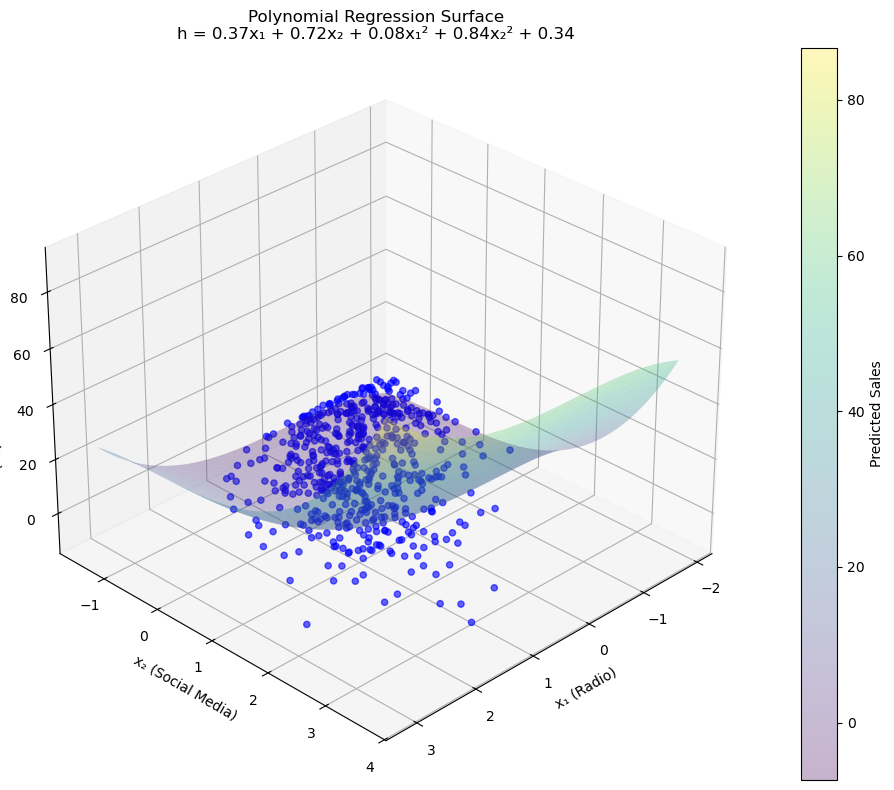

In [105]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Create figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot actual data points
scatter = ax.scatter(df['Radio'], 
                    df['Social Media'], 
                    df['Sales'],
                    c='blue',
                    alpha=0.6,
                    label='Actual Data')

# Create mesh grid for the polynomial surface
x1_surf = np.linspace(df['Radio'].min(), df['Radio'].max(), 100)
x2_surf = np.linspace(df['Social Media'].min(), df['Social Media'].max(), 100)
x1_surf, x2_surf = np.meshgrid(x1_surf, x2_surf)

# Calculate predicted values with polynomial terms
# h = w₁x₁ + w₂x₂ + w₃(x₁²) + w₄(x₂²) + w₀
h_surf = (w[1] * x1_surf + 
         w[2] * x2_surf + 
         w[3] * x1_surf**2 + 
         w[4] * x2_surf**2 +
         w[5] * x1_surf**3 +
         w[6] * x2_surf**3 + 
         w[0])  # w[0] is bias term

# Plot the polynomial surface
surface = ax.plot_surface(x1_surf, x2_surf, h_surf, 
                         alpha=0.3,
                         cmap='viridis')

# Add equation text to title
equation = f'h = {w[1]:.2f}x₁ + {w[2]:.2f}x₂ + {w[3]:.2f}x₁² + {w[4]:.2f}x₂² + {w[0]:.2f}'
ax.set_title(f'Polynomial Regression Surface\n{equation}')

# Add labels
ax.set_xlabel('x₁ (Radio)')
ax.set_ylabel('x₂ (Social Media)')
ax.set_zlabel('h (Predicted Sales)')

# Add colorbar
fig.colorbar(surface, ax=ax, label='Predicted Sales')

# Adjust the viewing angle for better visibility of the curved surface
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()